## <font color = 'blue'> 2.3 数值积分 </font>
    
<img src = "Images/2-17.png" alt = "Drawing" align = "center" style = "width:500px">

### 2.3.1 矩形公式
<img src = "Images/2-18.png" alt = "Drawing" align = "center" style = "width:500px">

<img src = "Images/2-19.png" alt = "Drawing" align = "center" style = "width:500px">

### 2.3.2 梯形公式
<img src = "Images/2-20.png" alt = "Drawing" align = "center" style = "width:500px">

<img src = "Images/2-21.png" alt = "Drawing" align = "center" style = "width:500px">

<img src = "Images/2-22.png" alt = "Drawing" align = "center" style = "width:500px">

- **误差**
<img src = "Images/2-23.png" alt = "Drawing" align = "center" style = "width:500px">

### 2.3.3 辛普森公式
<img src = "Images/2-24.png" alt = "Drawing" align = "center" style = "width:500px">

<img src = "Images/2-25.png" alt = "Drawing" align = "center" style = "width:500px">


### 2.3.4 案例
<img src = "Images/2-17.png" alt = "Drawing" align = "center" style = "width:500px">

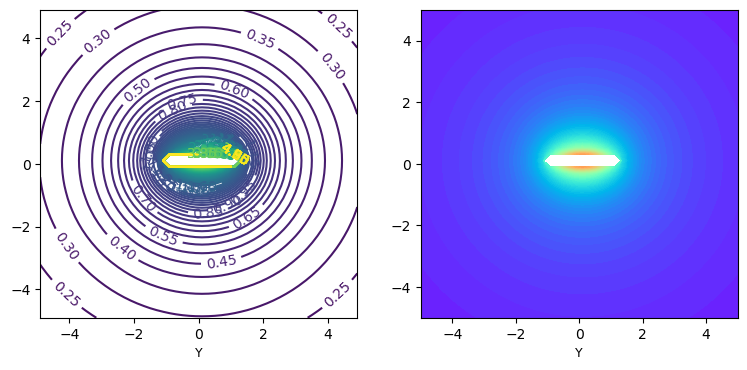

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------- 定义被积函数 -----------------------
def f(x, x0, y0):
    y = np.exp(-x**2)/np.sqrt((x-x0)**2 + y0**2)
    return y

N = 101  # 细杆离散点数
A = 1.0  # 细杆一半的长度
c = 1.0  # 常系数，即 1/(4\pi\epsilon)

h = 2*A/float(N-1) # 积分步长
xx = np.arange(-A, A+h, h)  # 积分节点各点坐标

xaxis = np.arange(-5, 5, 0.2)
yaxis = np.arange(-5, 5, 0.2)
field,_  = np.meshgrid(xaxis, yaxis)  # 从多个输出里面取某一个输出
for c in range(field.shape[0]):  # x 方向循环
    for r in range(field.shape[1]):  # y 方向循环
        y = 0
        for n in range(N-1):
            y += 0.5*h*(f(xx[n], xaxis[c], yaxis[r]) + f(xx[n+1], xaxis[c], yaxis[r]))
        field[r][c] = y
        
# ----------------------- 作图 -----------------------------
fig= plt.figure(figsize=(9,4))
ax1 = fig.add_subplot(121)
levels = np.arange(0, 5, 0.05)  # 设置等高线图的等高线
extent = [-5, 5, -5, 5]  # 设置图片的显示范围
cs = ax1.contour(field, levels, extent = extent,origin = 'lower')
ax1.clabel(cs)

ax2 = fig.add_subplot(122)
cs = ax2.contourf(field, levels, extent = extent, cmap=plt.cm.rainbow)

ax1.set_xlabel('X',fontsize = 9)
ax1.set_xlabel('Y',fontsize = 9)
ax2.set_xlabel('X',fontsize = 9)
ax2.set_xlabel('Y',fontsize = 9)
plt.show()

### 2.3.5 练习

<img src = 'Images/2-26.png' alt = 'Drawing' align = 'center' style = 'width:500px'>

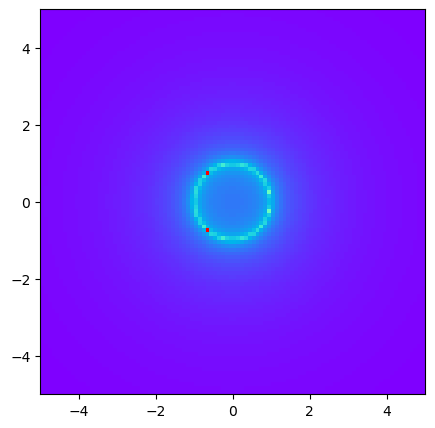

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 定义常数
epsilon0 = 8.854187817*1e-12  # 真空中介电常数
Q = 1  # 1C
R = 1  # 1m
a = 1/(4*np.pi*epsilon0)
factor = a*Q/(2*np.pi*R)*R  # 常系数因子

# 定义被积函数
def f(theta, x0, y0):
    y = factor*1/np.sqrt((x0 - R*np.cos(theta))**2 + (y0 - R*np.sin(theta))**2)
    return y

# 定义积分相关常数 
N = 100  # 积分步数
h = 2*np.pi/(N-1)  # 积分步长
theta = np.linspace(0, 2*np.pi, N)
x = np.linspace(-5, 5, 100)
y = x.copy()

V, _ = np.meshgrid(x, y)  # 电势分布初始化

for c in range(V.shape[1]):  # 计算第 c 列的值，对应 x 轴方向循环
    for r in range(V.shape[0]):  # 计算第 r 行的值，对应 y 轴方向的循环
        temp = 0
        for ii in range(1, N-1):
            temp += h/3*(4*f(theta[ii,], x[c,], y[r,]) + f(theta[ii+1,], x[c,], y[r,]) +f(theta[ii-1,], x[c,], y[r,]))
        V[r,c] = temp
    
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()
extent = [x.min(), x.max(), y.min(), y.max()]
ax.imshow(V, cmap=plt.cm.rainbow, origin = 'lower', extent = extent)
plt.show()